# Instalando o Pycaret

In [43]:
#!pip install pycaret

In [44]:
#!pip install scipy

In [74]:
# Importando bibliotecas necessárias
import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import shap
from pycaret.regression import *
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.cluster import KMeans 

# Tratando a base

In [2]:
df= pd.read_excel("Base_2022_2023.xlsx")

In [3]:
df = df[['cod_municipio_ibge','qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','pop_total','total_sim_tecnologia','porte_municipio']]

In [4]:
df.head()

,cod_municipio_ibge,qtd_abertas_Empresario_Individual,Mecanismos_incentivo,Reducao_IPTU,Isencao_IPTU,Reducao_ISSQN,Isencao_ISSQN,Isencao_Tx,Cessao_terrenos,Doacao_terrenos,...,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,media_NU_NOTA_REDACAO,valor_medio_recebido_familia,pib_per_capita_preco_corrente,perc_20_59_anos,pop_total,total_sim_tecnologia,porte_municipio
0,110001,194,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,504.034091,491.079545,543.558537,621.363636,18495,25091.18,0.587227,22516,18.0,2
1,110002,1275,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,...,495.727950,484.710248,518.811149,584.534161,17615,25730.20,0.591797,111148,12.0,4
2,110003,49,Sim,Não,Não,Não,Sim,Não,Não,Não,...,486.071429,447.628571,522.883333,471.428571,18956,32226.25,0.584567,5067,8.0,1
3,110004,1258,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,...,505.006061,490.991919,533.458933,611.717172,19376,29331.29,0.595584,86416,17.0,3
4,110005,257,Sim,Não,Sim,Não,Não,Não,Não,Não,...,477.045714,454.722857,480.696875,576.571429,17752,37069.25,0.598272,16088,8.0,2


In [5]:
df['qtd_cursos_engenharias'] = df['qtd_cursos_engenharias'].fillna(0)

df['qtd_cursos_negocios_direito'] = df['qtd_cursos_negocios_direito'].fillna(0)

df['total_sim_tecnologia'] = df['total_sim_tecnologia'].fillna(0)

df['taxa_homicidio'] = df['taxa_homicidio'].fillna(0)

df['RH_adm_dir'] = df['RH_adm_dir'].fillna(0)

In [6]:
df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [7]:
df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [8]:
df = pd.get_dummies(df, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [9]:
df = df[np.isfinite(df).all(1)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cod_municipio_ibge                 5570 non-null   int64  
 1   qtd_abertas_Empresario_Individual  5570 non-null   int64  
 2   taxa_homicidio                     5570 non-null   float64
 3   RH_adm_dir                         5570 non-null   float64
 4   densidade_banda_larga              5570 non-null   float64
 5   densidade_telefonia_movel          5570 non-null   float64
 6   qtd_cursos_engenharias             5570 non-null   float64
 7   qtd_cursos_negocios_direito        5570 non-null   float64
 8   media_notas_CN                     5570 non-null   float64
 9   media_notas_CH                     5570 non-null   float64
 10  media_NU_NOTA_LC                   5570 non-null   float64
 11  media_NU_NOTA_MT                   5570 non-null   float

In [11]:
df = df.set_index('cod_municipio_ibge')

In [12]:
df

,qtd_abertas_Empresario_Individual,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,...,Reducao_ISSQN_Sim,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,194,8.0,926.0,8.958074,70.647540,2.0,30.0,497.721951,504.034091,491.079545,...,0,0,0,0,0,0,0,0,0,0
110002,1275,38.0,2563.0,21.363407,93.858639,99.0,342.0,474.773986,495.727950,484.710248,...,0,0,1,0,1,1,0,0,1,0
110003,49,0.0,344.0,5.407539,78.369844,0.0,0.0,477.266667,486.071429,447.628571,...,0,1,0,0,0,1,0,0,0,0
110004,1258,21.0,1971.0,19.480189,105.350861,184.0,422.0,489.744000,505.006061,490.991919,...,1,0,1,1,1,0,0,0,0,0
110005,257,3.0,591.0,8.540527,108.074341,4.0,35.0,479.268750,477.045714,454.722857,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,222,1.0,528.0,6.423907,106.821408,4.0,12.0,449.954054,479.917073,473.014634,...,0,0,0,0,0,0,0,1,0,0
522205,66,0.0,394.0,8.442568,104.276827,0.0,0.0,450.285714,464.383333,457.593333,...,0,0,1,0,1,0,0,0,1,0
522220,23,0.0,403.0,1.240118,66.485816,0.0,0.0,431.645455,443.025000,426.491667,...,0,0,0,1,1,0,0,0,0,0


## Nova base teste

In [133]:
df_2 = pd.read_excel("Base_novos_dados_2018_2019.xlsx")

In [134]:
df_2 = df_2[['cod_municipio_ibge','qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','pop_total','total_sim_tecnologia','porte_municipio']]

In [135]:
df_2['qtd_cursos_engenharias'] = df_2['qtd_cursos_engenharias'].fillna(0)

df_2['qtd_cursos_negocios_direito'] = df_2['qtd_cursos_negocios_direito'].fillna(0)

df_2['total_sim_tecnologia'] = df_2['total_sim_tecnologia'].fillna(0)

df_2['taxa_homicidio'] = df_2['taxa_homicidio'].fillna(0)

df_2['RH_adm_dir'] = df_2['RH_adm_dir'].fillna(0)

In [136]:
df_2[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df_2[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [137]:
df_2[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df_2[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [138]:
df_2 = pd.get_dummies(df_2, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [139]:
df_2 = df_2[np.isfinite(df_2).all(1)]

In [140]:
df_2 = df_2.set_index('cod_municipio_ibge')

# Dividindo em treino e test

Adaleny, fiz a divisão de treino e teste baseado na estratificação

In [21]:
treino = df.groupby('porte_municipio', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state = 123))

teste = df.drop(treino.index)

print(treino.shape, teste.shape)

(4178, 31) (1392, 31)


In [22]:
treino = treino.drop('porte_municipio', axis = 1)
teste= teste.drop('porte_municipio', axis = 1)

In [23]:
#teste= teste.drop('qtd_abertas_Empresario_Individual', axis = 1)

In [24]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4178 entries, 270660 to 355220
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   qtd_abertas_Empresario_Individual  4178 non-null   int64  
 1   taxa_homicidio                     4178 non-null   float64
 2   RH_adm_dir                         4178 non-null   float64
 3   densidade_banda_larga              4178 non-null   float64
 4   densidade_telefonia_movel          4178 non-null   float64
 5   qtd_cursos_engenharias             4178 non-null   float64
 6   qtd_cursos_negocios_direito        4178 non-null   float64
 7   media_notas_CN                     4178 non-null   float64
 8   media_notas_CH                     4178 non-null   float64
 9   media_NU_NOTA_LC                   4178 non-null   float64
 10  media_NU_NOTA_MT                   4178 non-null   float64
 11  media_NU_NOTA_REDACAO              4178 non-null 

# Pycaret

## Setup

In [25]:
regression_setup = setup(data = treino, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

,Description,Value
0,Session id,42
1,Target,qtd_abertas_Empresario_Individual
2,Target type,Regression
3,Original data shape,"(4178, 30)"
4,Transformed data shape,"(4178, 30)"
5,Transformed train set shape,"(2924, 30)"
6,Transformed test set shape,"(1254, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


## Comparando Modelos 

### Usando RMSE

In [26]:
best_model = compare_models(sort = 'RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,138.3505,366711.5141,578.1140,0.9485,0.6986,0.7208,0.2560
omp,Orthogonal Matching Pursuit,222.3184,1304406.5691,947.6668,0.9245,1.1778,2.6551,0.2400
br,Bayesian Ridge,181.8900,1662429.6217,1095.5381,0.9077,0.9878,1.7161,0.2420
en,Elastic Net,184.2287,1682806.6179,1101.8769,0.9066,0.9739,1.7860,0.2500
lasso,Lasso Regression,188.2600,1694558.2085,1105.2548,0.9062,1.0163,1.8654,0.5920
lr,Linear Regression,190.6498,1698940.5667,1107.4096,0.9059,1.0306,1.9074,1.1940
llar,Lasso Least Angle Regression,188.5823,1699738.0201,1107.5502,0.9060,1.0167,1.8677,0.2380
ridge,Ridge Regression,190.2026,1700217.5749,1107.8158,0.9059,1.0278,1.8979,0.2400
lar,Least Angle Regression,242.1325,2320353.7934,1303.3717,0.8385,1.1269,2.3803,0.2380
par,Passive Aggressive Regressor,263.7175,4149630.2259,1461.4602,0.8621,1.0355,1.7923,0.2500


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [27]:
# verificando os hiperparâmetros do modelo 

print(best_model)

HuberRegressor()


In [28]:
best_model = create_model('huber', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,141.8830,353570.7113,594.6181,0.9850,0.7202,0.6571
1,152.2660,373452.7730,611.1078,0.8825,0.6260,0.5953
2,150.8734,512538.5771,715.9180,0.9430,0.7083,0.7101
3,89.4697,55167.1622,234.8769,0.9366,0.6656,0.6878
4,157.2604,538828.3469,734.0493,0.9955,0.7731,0.9538
Mean,138.3505,366711.5141,578.1140,0.9485,0.6986,0.7208
Std,24.9394,172143.9775,180.2656,0.0402,0.0499,0.1227


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Plotando alguns graficos 

In [29]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

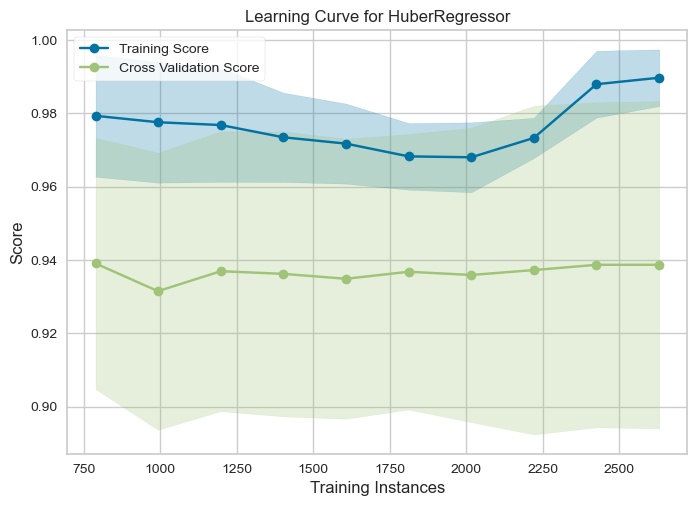

In [30]:
plot_model(best_model, plot = 'learning')

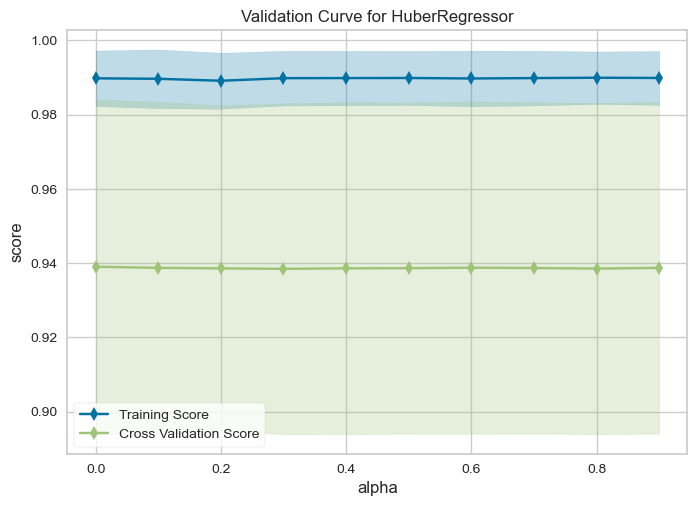

In [31]:
plot_model(best_model, plot='vc')

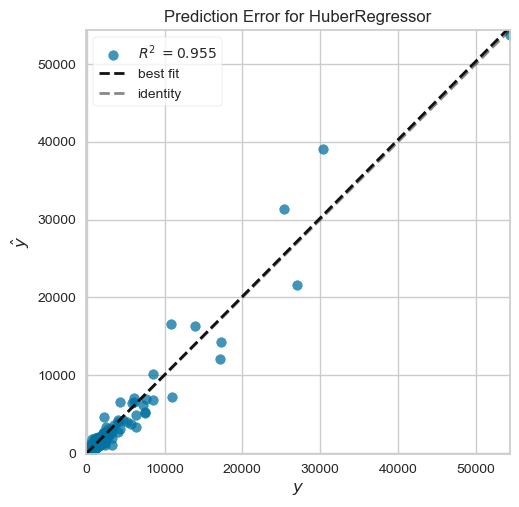

In [32]:
plot_model(best_model, plot='error')

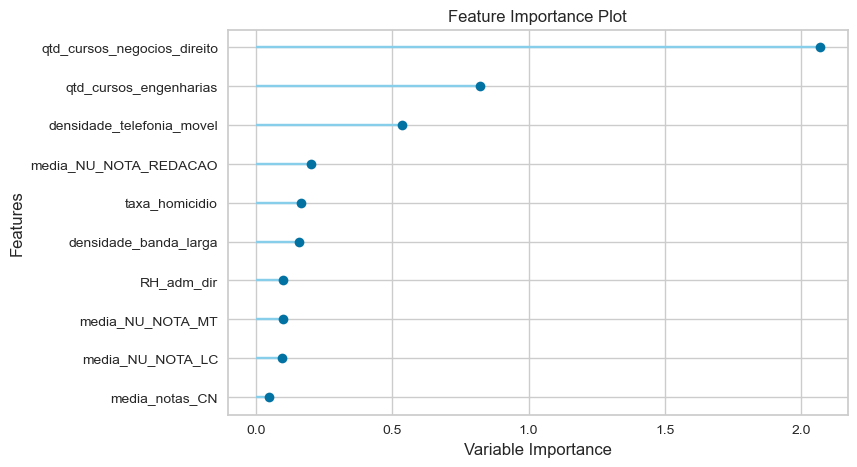

In [33]:
plot_model(best_model, plot='feature')

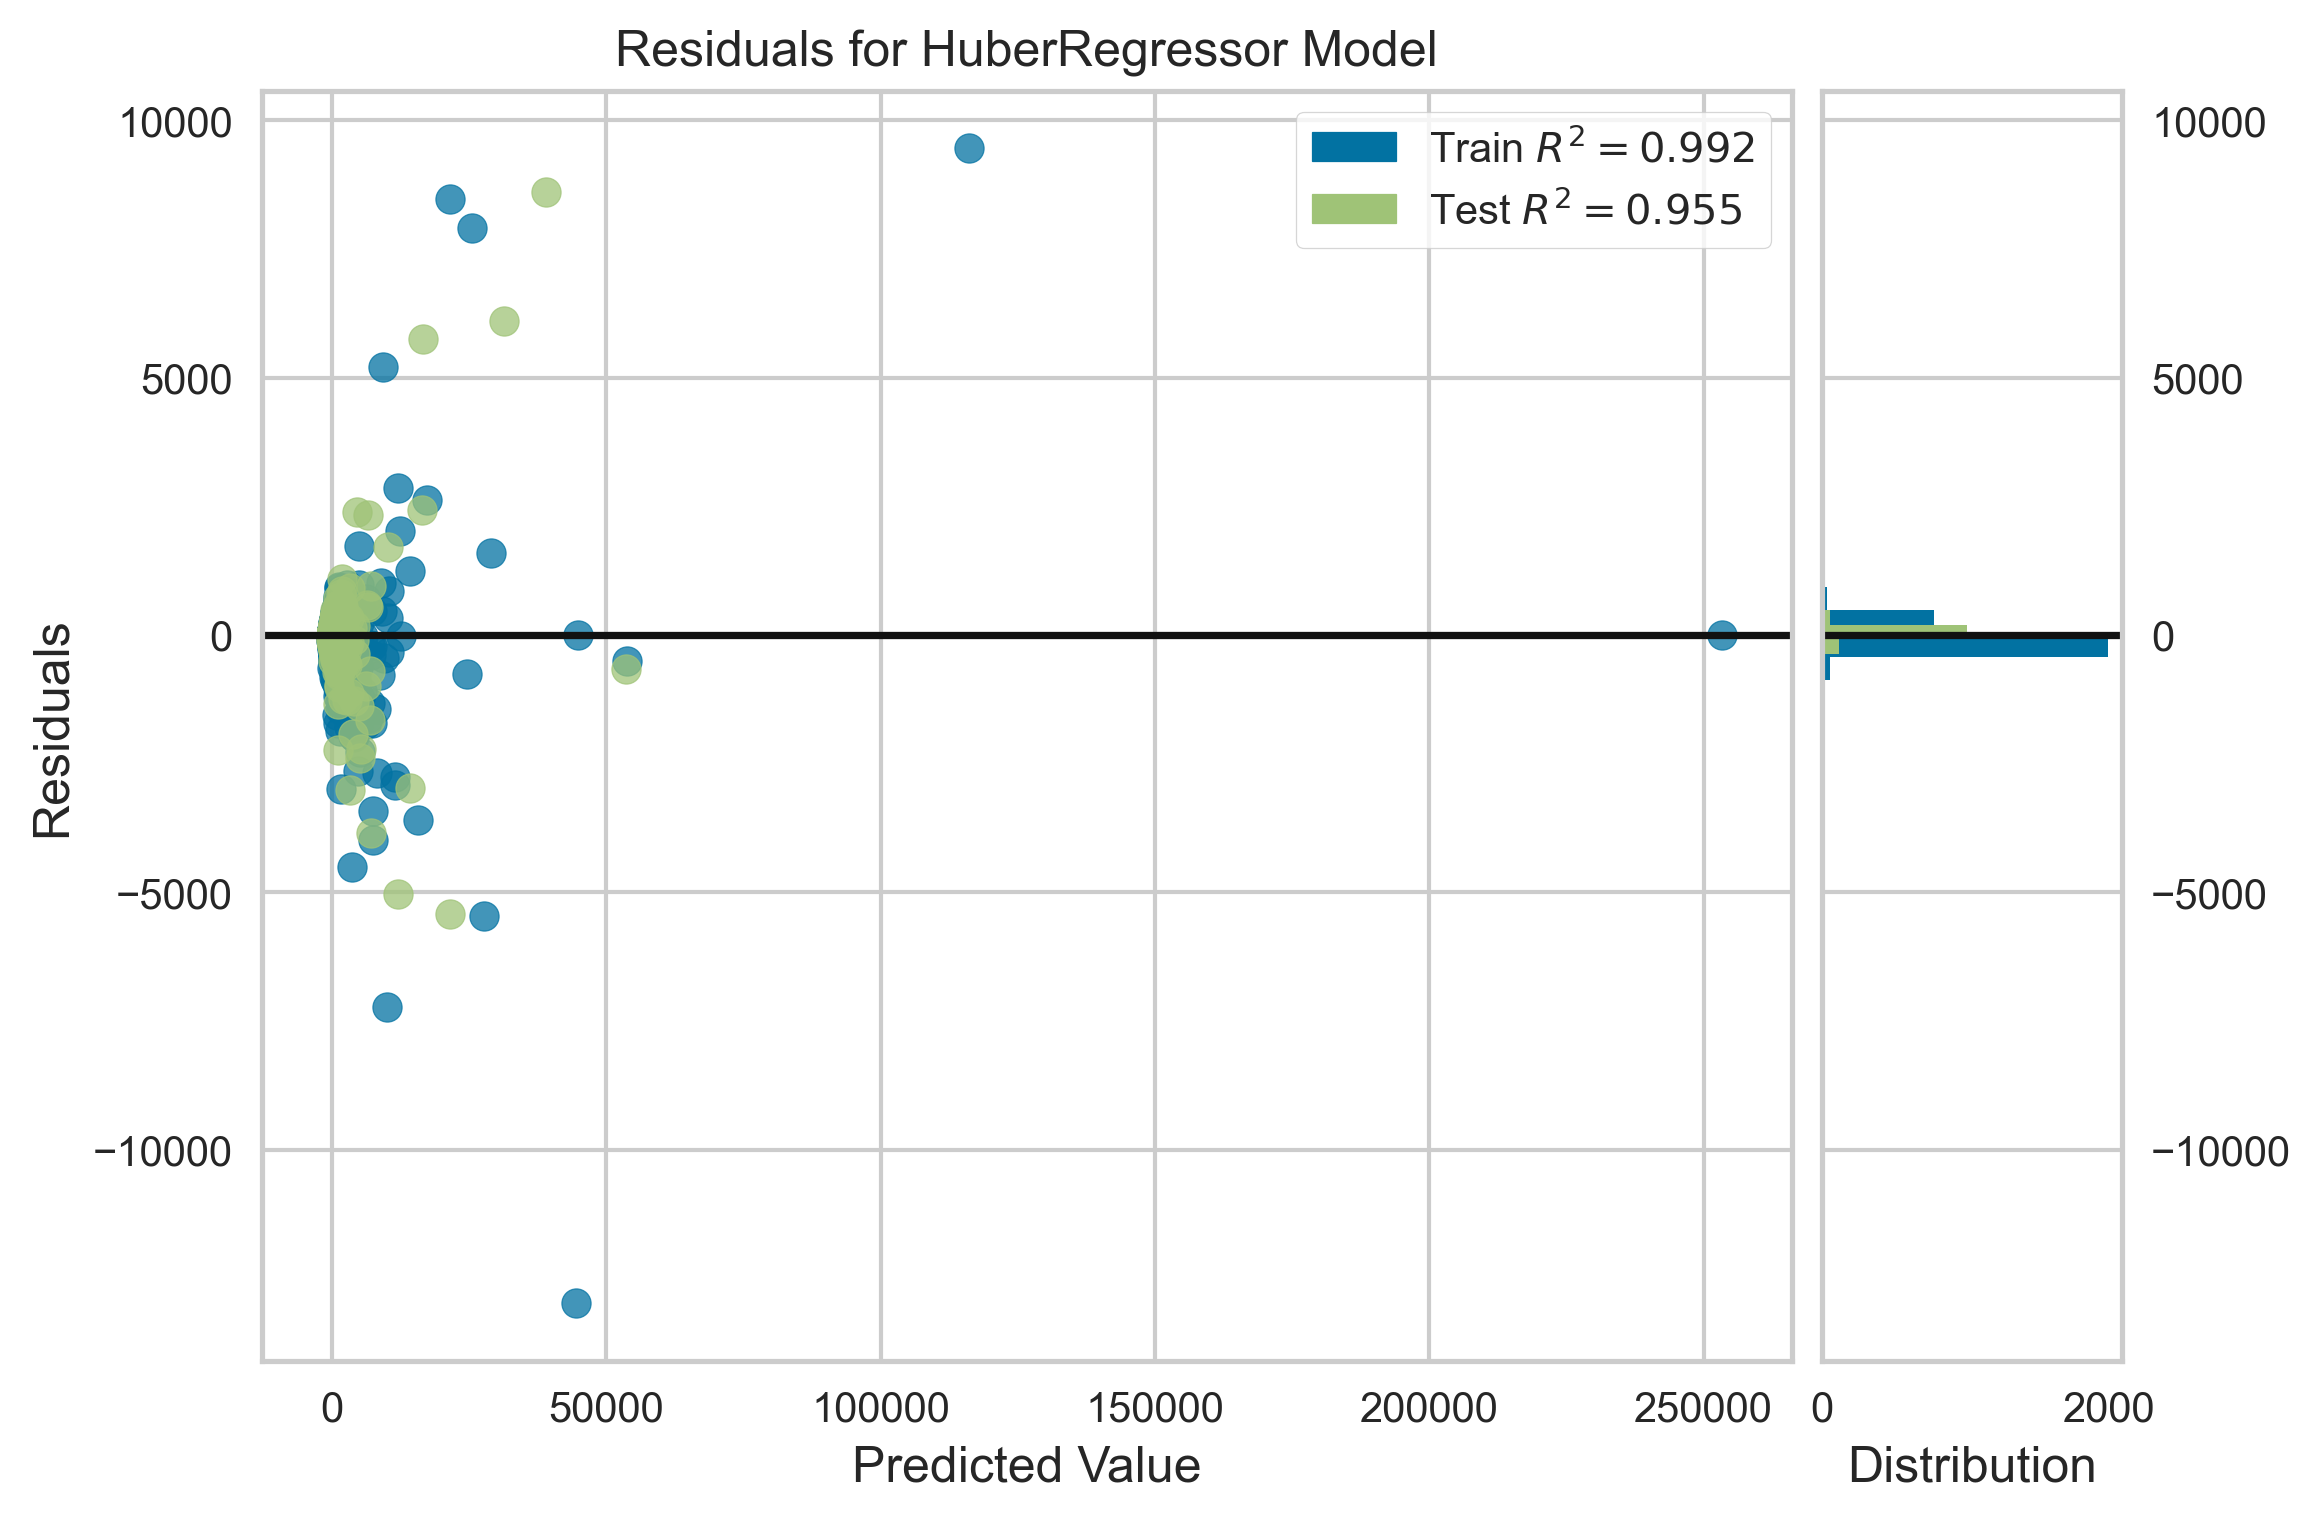

In [34]:
plot_model(best_model, plot='residuals',  scale = 3)

### Tunando o modelo

In [35]:
# em alguns tutoriais vi que não fizeram nenhuma modificação manual dos parametros, e eles já modificavam. 
#Esse parece que não conteceu do mesmo jeito. 

tuned = tune_model(best_model, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,141.0645,329320.7964,573.8648,0.9861,0.7124,0.6766
1,153.0118,375921.3360,613.1242,0.8817,0.6539,0.6034
2,150.4280,497575.6228,705.3904,0.9446,0.6997,0.7065
3,89.7567,55087.6462,234.7076,0.9367,0.6430,0.6916
4,155.8591,543075.1470,736.9363,0.9954,0.7712,0.8733
Mean,138.0240,360196.1097,572.8047,0.9489,0.6960,0.7103
Std,24.6397,171236.4535,179.1394,0.0406,0.0459,0.0889


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [36]:
#estranho, era para monstrar o que foi testado de diferente com o tuned, parece que esta igual.
#Sem falar que os resultados parecem piores depois de tunar 

print(tuned)

HuberRegressor(alpha=0.5, epsilon=1.7)


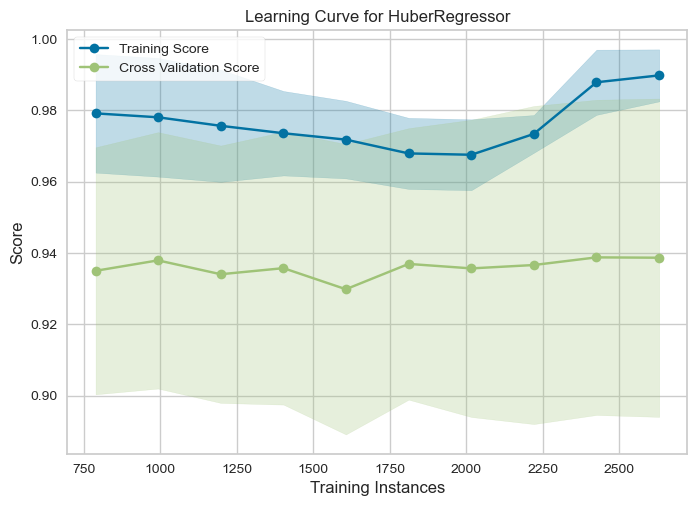

In [37]:
plot_model(tuned, plot = 'learning')  #use_train_data = True

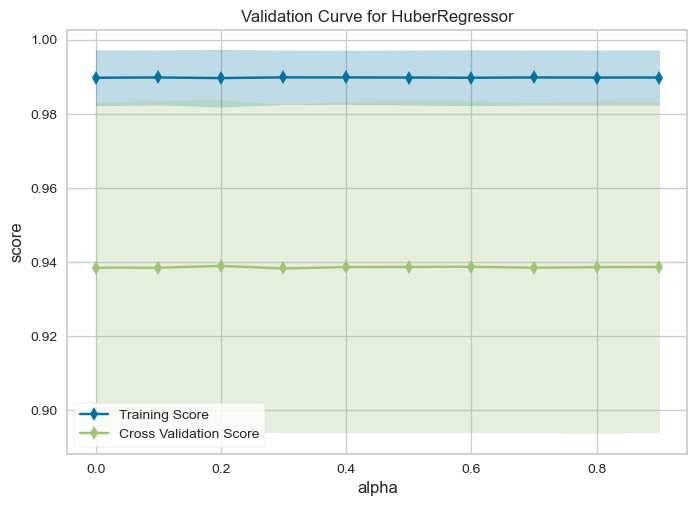

In [38]:
# Validation Curve
plot_model(tuned, plot='vc')


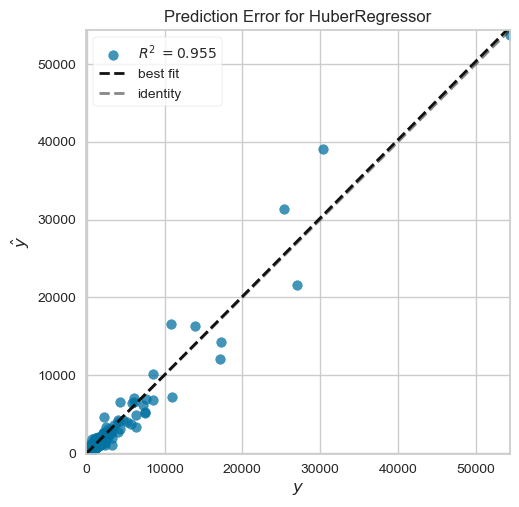

In [39]:
plot_model(tuned, plot='error')

# O R² esta bem baixo 

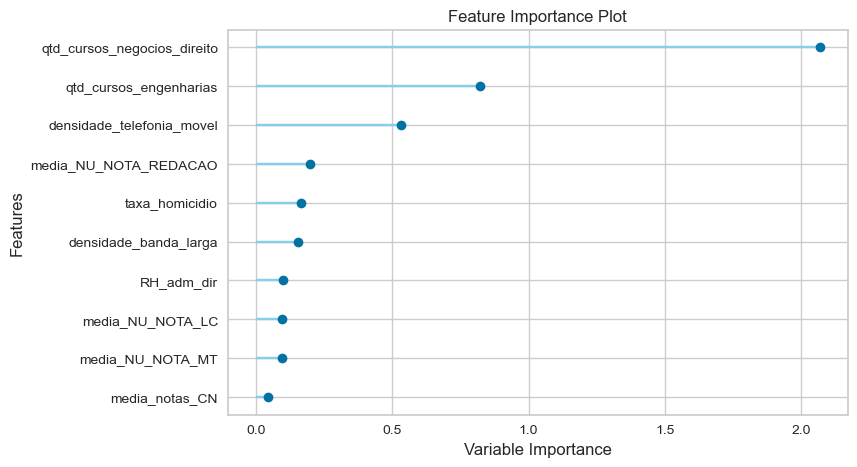

In [40]:
plot_model(tuned, plot='feature' )

In [41]:
plot_model(tuned, plot='feature', save = True )

'Feature Importance.png'

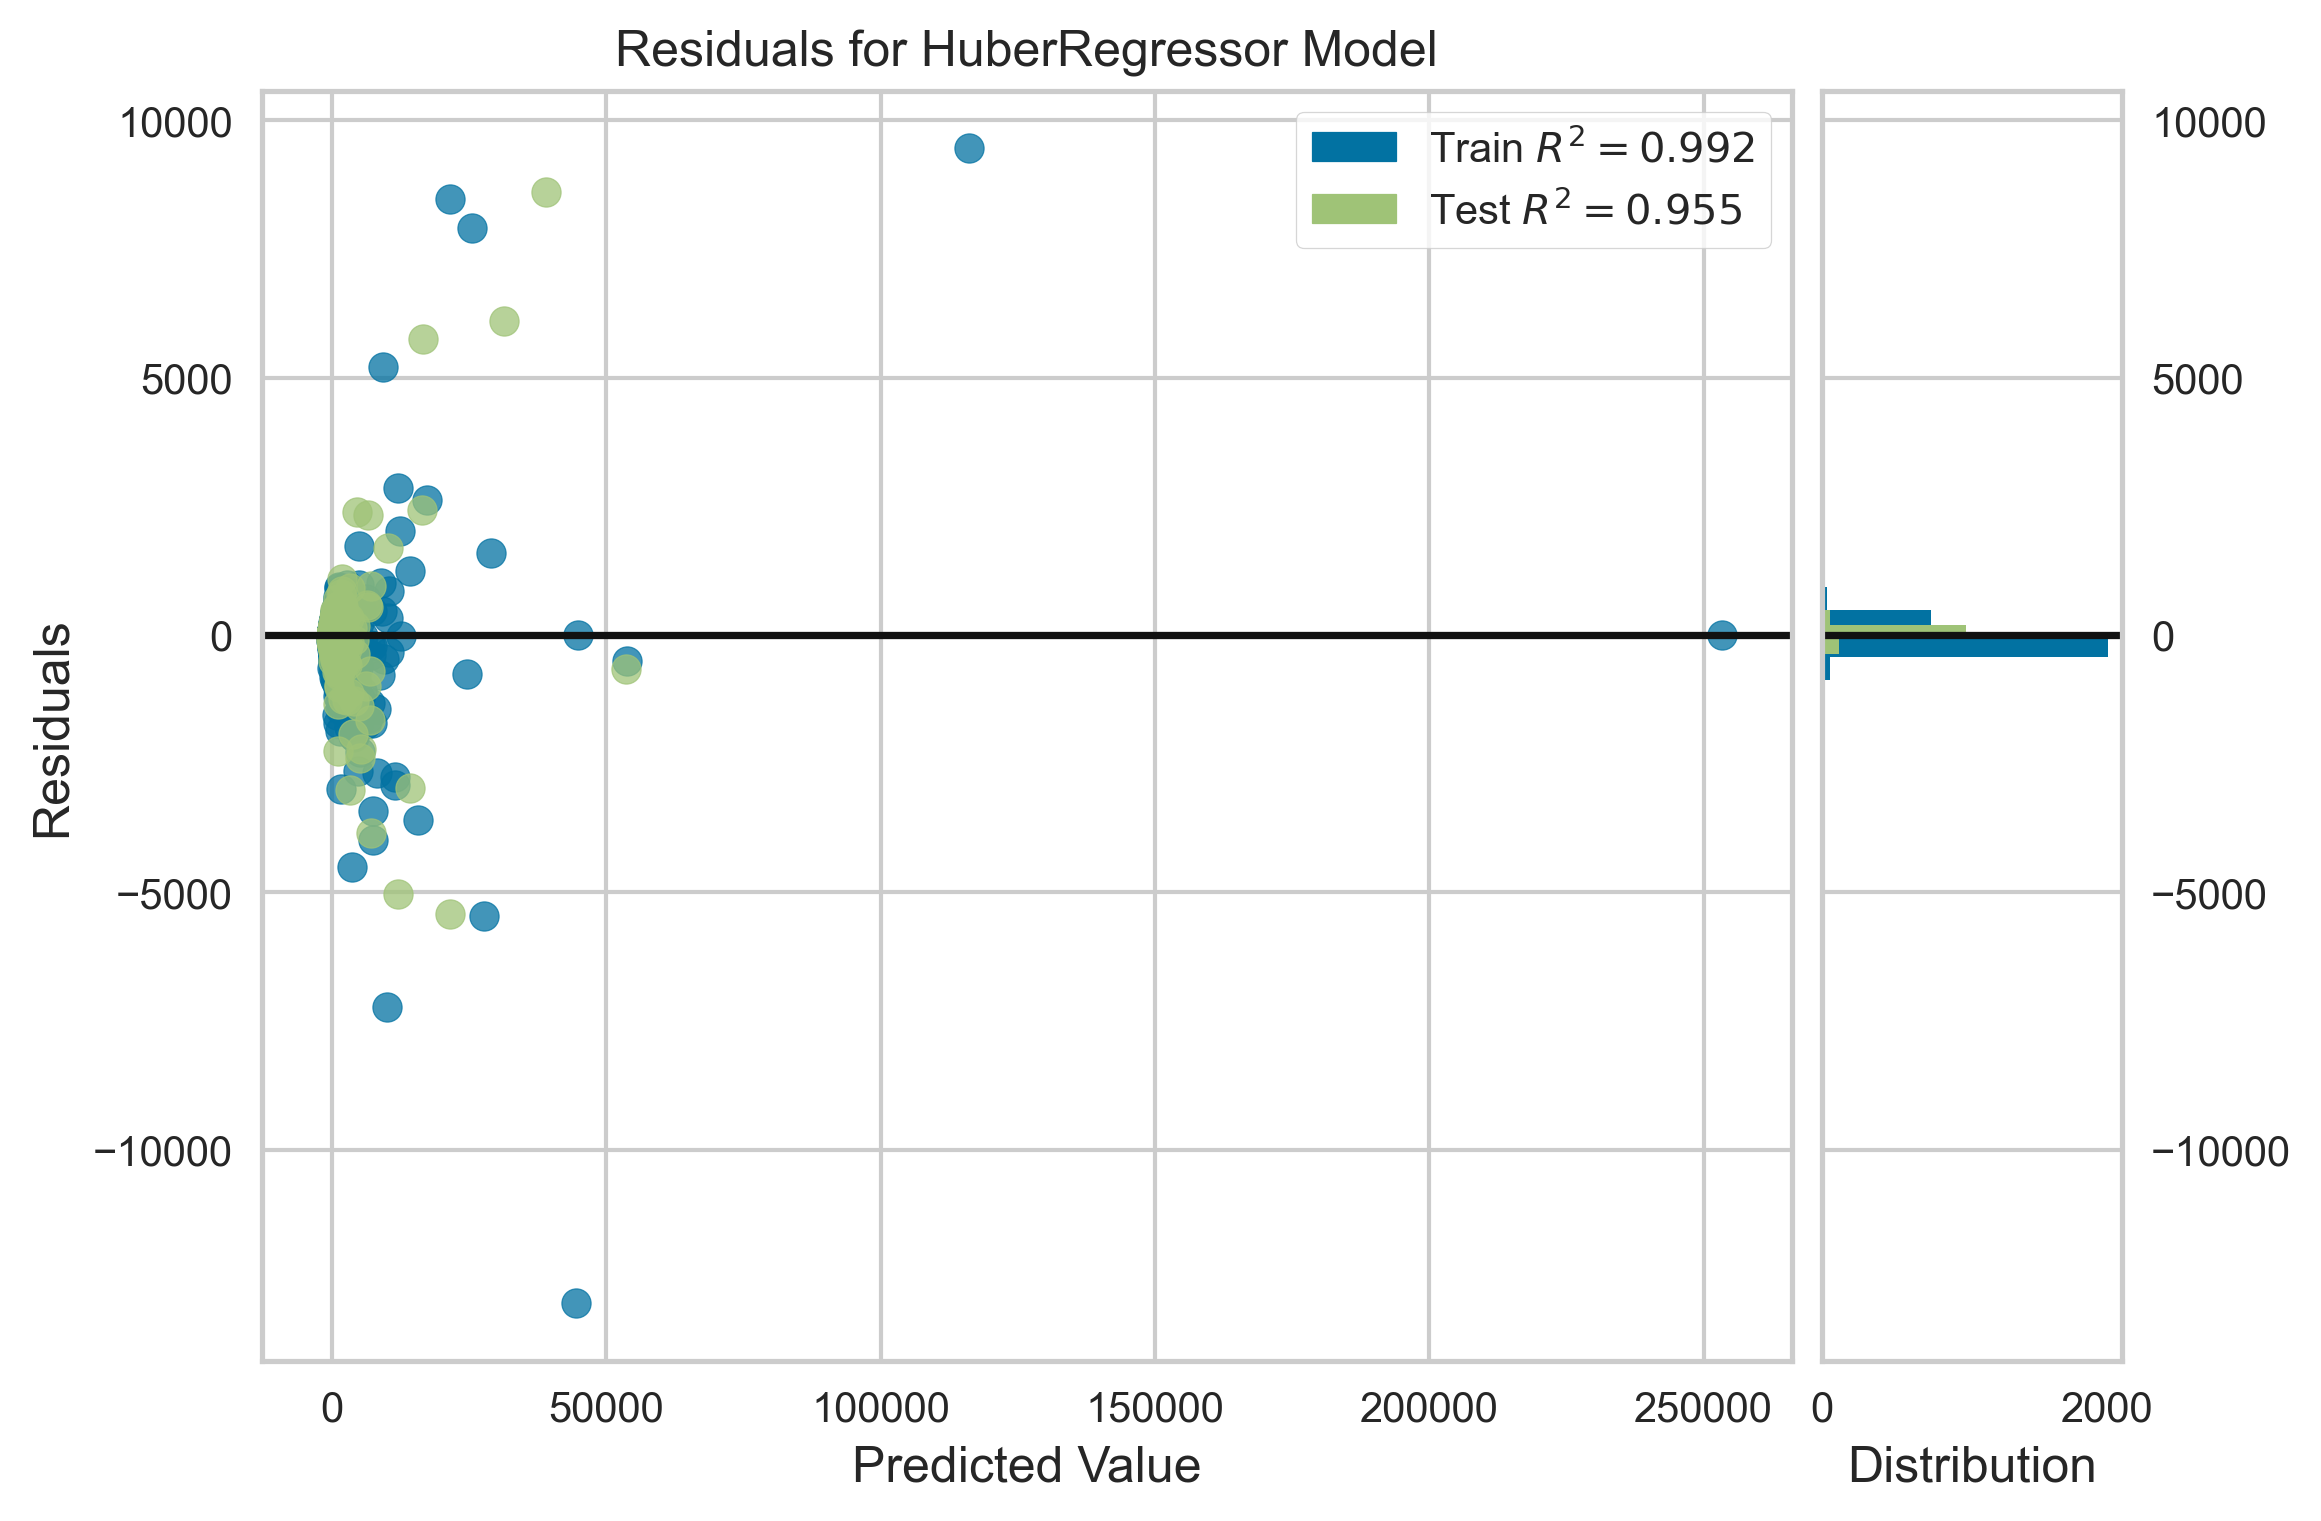

In [42]:
plot_model(tuned, plot='residuals',  scale = 3)

#os resultados parecem muito distantes uns dos outros 

In [43]:
final_model_baseline = finalize_model(tuned)

### Previsão

In [44]:
pred_treino = predict_model(final_model_baseline, data = treino)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,131.7326,258644.3471,508.5709,0.9890,0.7048,0.7478


In [45]:
pred_treino

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
270660,6.0,0.0,0.463208,33.152462,0.0,0.0,395.628571,422.762512,445.825012,436.742859,...,0,0,0,0,1,0,0,0,33,50.239255
316730,0.0,186.0,12.130569,67.534187,0.0,0.0,490.662506,527.674988,496.262512,539.212524,...,0,0,0,0,0,1,0,0,26,12.849264
251278,0.0,260.0,8.554277,66.133064,0.0,0.0,444.866669,473.833344,443.799988,451.933319,...,0,1,1,0,1,0,0,0,15,-3.476766
430870,0.0,226.0,30.952818,88.121902,0.0,0.0,488.318176,497.261536,469.307678,565.990906,...,0,0,0,0,0,0,0,0,74,102.689113
314920,0.0,369.0,5.450562,94.467270,0.0,0.0,469.000000,452.000000,449.950012,554.099976,...,0,0,0,0,0,0,0,0,37,51.653274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355030,454.0,127721.0,32.097408,125.004189,12809.0,52259.0,515.010742,548.616333,534.100159,581.029175,...,0,0,0,1,0,0,1,0,253408,253407.766344
291080,264.0,5937.0,11.146967,125.226761,494.0,1546.0,497.371368,523.909973,509.181915,543.344971,...,0,0,0,0,0,0,0,0,9589,10386.017573
430510,86.0,7345.0,34.121548,101.562866,484.0,1699.0,520.229065,556.289062,535.819946,581.916504,...,0,0,0,0,0,0,1,0,9898,9435.673314


Text(0, 0.5, 'Valores preditos')

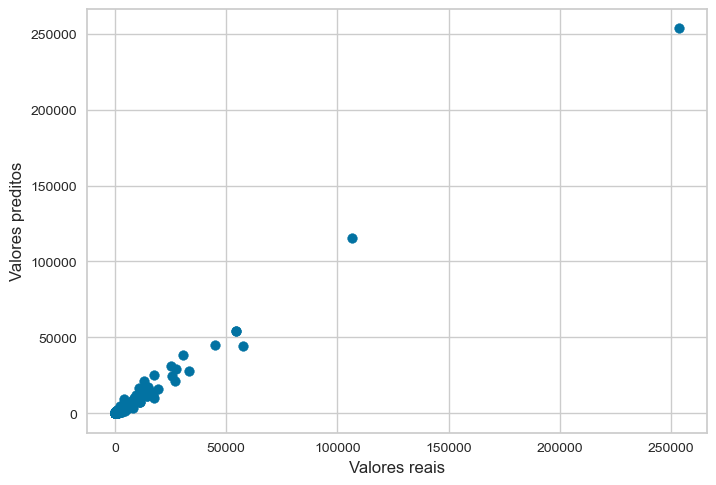

In [46]:
plt.scatter(pred_treino['qtd_abertas_Empresario_Individual'],pred_treino['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')

Previsão de dados não vistos

In [47]:
pred_unseen = predict_model(final_model_baseline, data = teste)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,122.8559,134040.6877,366.1157,0.9622,0.6865,0.7617


In [48]:
pred_unseen

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110005,3.0,591.0,8.540527,108.074341,4.0,35.0,479.268738,477.045715,454.722870,480.696869,...,0,0,0,0,1,0,0,0,257,244.431312
110007,1.0,382.0,3.261486,51.545662,0.0,0.0,439.184601,466.414276,432.535706,445.276917,...,0,1,0,1,0,0,0,0,86,38.251022
110008,3.0,573.0,4.388471,35.367435,5.0,12.0,438.418182,465.692108,451.828949,478.290924,...,1,1,0,0,1,0,0,0,106,184.035830
110011,10.0,1484.0,20.346228,101.132721,8.0,114.0,472.343292,501.169189,481.437683,507.111206,...,0,0,0,0,0,0,1,0,617,749.728184
110013,6.0,1214.0,7.779695,56.914486,3.0,26.0,460.839630,482.138611,470.749115,485.543396,...,0,0,0,1,1,0,0,0,279,445.707551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522100,5.0,195.0,2.852253,103.565315,0.0,0.0,464.779999,487.066681,474.000000,520.359985,...,0,0,0,0,0,0,0,0,41,52.918899
522119,4.0,271.0,10.329089,116.298340,0.0,0.0,435.885712,480.299988,450.257141,503.938110,...,0,1,0,0,0,1,0,0,108,112.937606
522190,0.0,184.0,9.433472,78.092514,0.0,0.0,426.950012,483.766663,451.266663,422.950012,...,0,0,0,0,0,1,0,0,30,114.281526


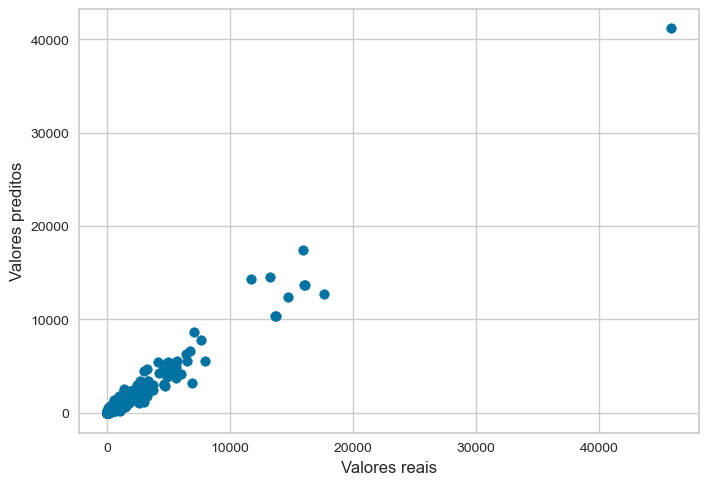

In [49]:
plt.scatter(pred_unseen['qtd_abertas_Empresario_Individual'],pred_unseen['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2022.png')

## Previsão - Novos dados (VIs = 2018 e VD = 2019) 

In [50]:
pred_treino_2 = predict_model(final_model_baseline, data = df_2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,140.0121,361851.6957,601.5411,0.9783,0.7536,1.0564


In [51]:
pred_treino_2

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,7.0,926.0,5.391153,34.342995,6.0,23.0,480.664276,543.020264,495.929718,502.991425,...,0,0,0,0,0,0,0,0,167,263.722029
110002,41.0,2563.0,11.445074,86.588539,42.0,299.0,481.314240,549.247253,513.304749,512.975891,...,1,0,1,1,0,0,1,0,1058,1725.522077
110003,0.0,344.0,3.990964,79.838104,0.0,0.0,442.604156,506.685181,466.007416,484.924988,...,0,0,0,1,0,0,0,0,50,98.784840
110004,17.0,1971.0,12.382995,89.462151,202.0,469.0,484.990723,549.739380,513.924805,524.946716,...,1,1,1,0,0,0,0,0,987,2022.436311
110005,2.0,591.0,7.847822,89.952827,0.0,38.0,466.433807,551.494751,498.394745,493.949310,...,0,0,0,0,1,0,0,0,181,286.187252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,2.0,528.0,7.191805,33.744499,0.0,0.0,474.571777,522.414612,493.386505,503.091766,...,0,0,0,0,0,1,0,0,150,142.910724
522205,4.0,394.0,8.601167,78.874527,0.0,0.0,439.651611,498.125641,463.625641,479.803223,...,1,0,1,0,0,0,1,0,47,138.877294
522220,3.0,403.0,5.055907,5.833738,0.0,0.0,440.164276,513.099976,450.394440,504.899994,...,0,1,1,0,0,0,0,0,22,55.409321


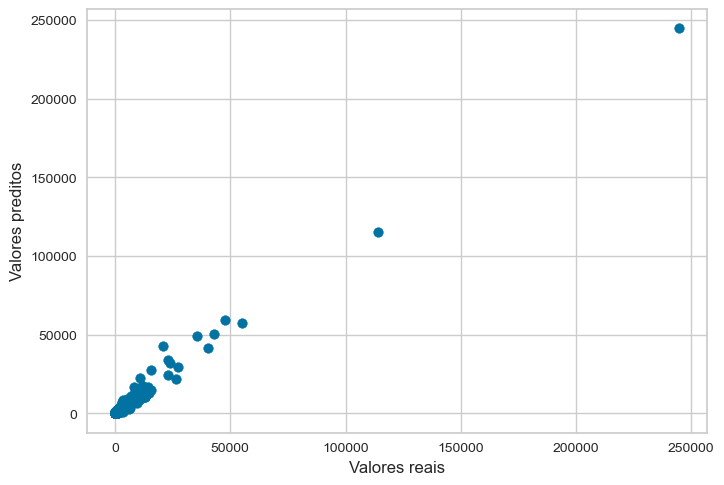

In [52]:
plt.scatter(pred_treino_2['qtd_abertas_Empresario_Individual'],pred_treino_2['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2019.png')

In [53]:
df.to_excel('dados_previsao.xlsx')

## Testando Radom Forest

### MAPE

In [54]:
regression_setup_mape = setup(data = treino, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

,Description,Value
0,Session id,42
1,Target,qtd_abertas_Empresario_Individual
2,Target type,Regression
3,Original data shape,"(4178, 30)"
4,Transformed data shape,"(4178, 30)"
5,Transformed train set shape,"(2924, 30)"
6,Transformed test set shape,"(1254, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


In [55]:
best_model_mape = compare_models(sort = 'MAPE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,194.7635,13973713.5514,2468.4513,0.7519,0.4226,0.4050,0.2940
et,Extra Trees Regressor,164.7040,8843174.1987,1798.7295,0.8626,0.4348,0.4314,0.3080
xgboost,Extreme Gradient Boosting,219.8897,12499803.0887,2477.6845,0.7576,0.5161,0.4630,0.2700
knn,K Neighbors Regressor,232.8533,16585764.7820,2662.1187,0.7470,0.5084,0.5136,0.2880
dt,Decision Tree Regressor,258.2918,18285281.4095,2740.5534,0.7165,0.5761,0.5364,0.2760
gbr,Gradient Boosting Regressor,199.8412,11344194.8252,2225.1814,0.8180,0.5345,0.5770,0.2760
huber,Huber Regressor,138.3505,366711.5141,578.1140,0.9485,0.6986,0.7208,0.2600
lightgbm,Light Gradient Boosting Machine,455.7260,21904137.8452,3740.2345,0.0218,0.7515,1.5525,0.4880
br,Bayesian Ridge,181.8900,1662429.6217,1095.5381,0.9077,0.9878,1.7161,0.2800
en,Elastic Net,184.2287,1682806.6179,1101.8769,0.9066,0.9739,1.7860,0.2700


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [56]:
print(best_model_mape)

RandomForestRegressor(n_jobs=-1, random_state=42)


In [57]:
best_model_mape = create_model('rf', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,182.4019,4567868.4641,2137.2572,0.8067,0.4205,0.4058
1,153.4471,1195748.8814,1093.5030,0.6238,0.4179,0.3853
2,137.6930,1086608.2810,1042.4050,0.8791,0.4306,0.4111
3,53.5668,17364.7915,131.7755,0.9801,0.4148,0.4055
4,446.7085,63000977.3387,7937.3155,0.4700,0.4290,0.4174
Mean,194.7635,13973713.5514,2468.4513,0.7519,0.4226,0.4050
Std,133.0637,24561254.2446,2807.2160,0.1828,0.0062,0.0108


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [58]:
tuned_mape = tune_model(best_model_mape, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,172.5487,744158.4627,862.6462,0.9685,0.7898,1.1382
1,193.0442,1029151.3126,1014.4710,0.6762,0.8262,1.2232
2,163.4294,430379.3961,656.0331,0.9521,0.8663,1.3677
3,96.6468,35133.3831,187.4390,0.9596,0.8674,1.3259
4,491.7311,68978277.4357,8305.3162,0.4197,0.8379,1.2779
Mean,223.4801,14243419.9980,2205.1811,0.7952,0.8375,1.2666
Std,137.9650,27369424.8270,3062.7759,0.2176,0.0287,0.0803


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


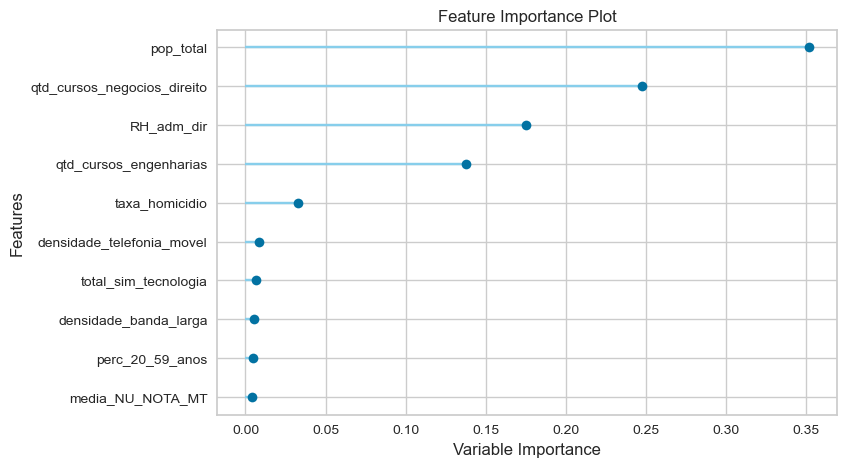

In [59]:
plot_model(best_model_mape, plot='feature' )

In [60]:
final_model_baseline_mape = finalize_model(best_model_mape)

In [61]:
pred_teste_mape= predict_model(final_model_baseline_mape, data = teste)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,84.6395,175013.8789,418.3466,0.9507,0.3986,0.3724


In [62]:
pred_teste_mape

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110005,3.0,591.0,8.540527,108.074341,4.0,35.0,479.268738,477.045715,454.722870,480.696869,...,0,0,0,0,1,0,0,0,257,226.97
110007,1.0,382.0,3.261486,51.545662,0.0,0.0,439.184601,466.414276,432.535706,445.276917,...,0,1,0,1,0,0,0,0,86,53.20
110008,3.0,573.0,4.388471,35.367435,5.0,12.0,438.418182,465.692108,451.828949,478.290924,...,1,1,0,0,1,0,0,0,106,104.85
110011,10.0,1484.0,20.346228,101.132721,8.0,114.0,472.343292,501.169189,481.437683,507.111206,...,0,0,0,0,0,0,1,0,617,793.21
110013,6.0,1214.0,7.779695,56.914486,3.0,26.0,460.839630,482.138611,470.749115,485.543396,...,0,0,0,1,1,0,0,0,279,264.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522100,5.0,195.0,2.852253,103.565315,0.0,0.0,464.779999,487.066681,474.000000,520.359985,...,0,0,0,0,0,0,0,0,41,45.48
522119,4.0,271.0,10.329089,116.298340,0.0,0.0,435.885712,480.299988,450.257141,503.938110,...,0,1,0,0,0,1,0,0,108,108.44
522190,0.0,184.0,9.433472,78.092514,0.0,0.0,426.950012,483.766663,451.266663,422.950012,...,0,0,0,0,0,1,0,0,30,43.71


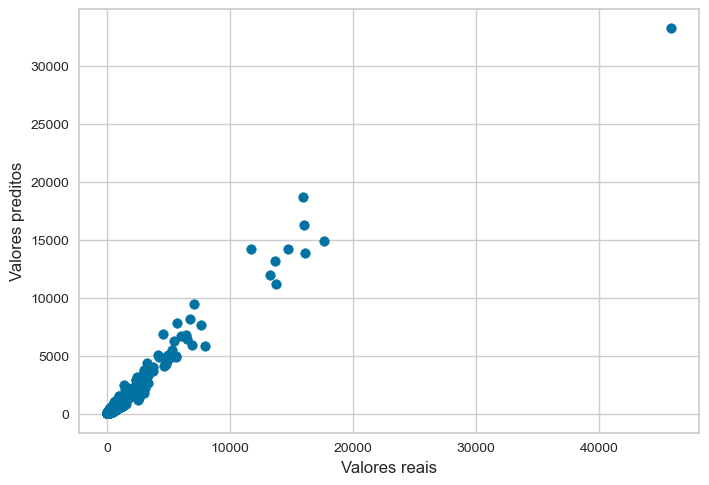

In [63]:
plt.scatter(pred_teste_mape['qtd_abertas_Empresario_Individual'],pred_teste_mape['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2019.png')

In [64]:
pred_teste_mape.to_excel('previsao_mape.xlsx')

In [65]:
pred_2018_2019 = predict_model(final_model_baseline_mape, data = df_2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,116.0603,988416.7487,994.1915,0.9408,0.4431,0.4471


In [66]:
pred_2018_2019

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,7.0,926.0,5.391153,34.342995,6.0,23.0,480.664276,543.020264,495.929718,502.991425,...,0,0,0,0,0,0,0,0,167,230.73
110002,41.0,2563.0,11.445074,86.588539,42.0,299.0,481.314240,549.247253,513.304749,512.975891,...,1,0,1,1,0,0,1,0,1058,1443.61
110003,0.0,344.0,3.990964,79.838104,0.0,0.0,442.604156,506.685181,466.007416,484.924988,...,0,0,0,1,0,0,0,0,50,55.36
110004,17.0,1971.0,12.382995,89.462151,202.0,469.0,484.990723,549.739380,513.924805,524.946716,...,1,1,1,0,0,0,0,0,987,1304.79
110005,2.0,591.0,7.847822,89.952827,0.0,38.0,466.433807,551.494751,498.394745,493.949310,...,0,0,0,0,1,0,0,0,181,212.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,2.0,528.0,7.191805,33.744499,0.0,0.0,474.571777,522.414612,493.386505,503.091766,...,0,0,0,0,0,1,0,0,150,113.18
522205,4.0,394.0,8.601167,78.874527,0.0,0.0,439.651611,498.125641,463.625641,479.803223,...,1,0,1,0,0,0,1,0,47,82.81
522220,3.0,403.0,5.055907,5.833738,0.0,0.0,440.164276,513.099976,450.394440,504.899994,...,0,1,1,0,0,0,0,0,22,40.39


Text(0, 0.5, 'Valores preditos')

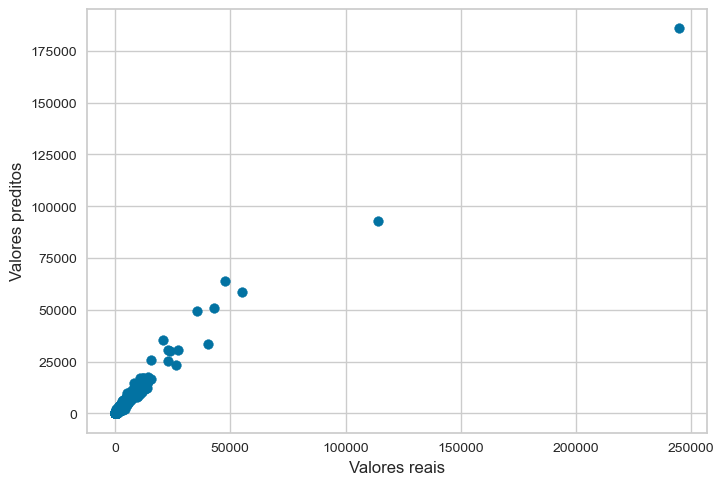

In [68]:
plt.scatter(pred_2018_2019['qtd_abertas_Empresario_Individual'],pred_2018_2019['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2019.png')

In [67]:
pred_2018_2019.to_excel('previsao_mape_2018_2019.xlsx')

## Clusterização 

###  K-means

In [156]:
df_c= df_2.set_index('qtd_abertas_Empresario_Individual')

In [157]:
df_c.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 167 to 47504
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taxa_homicidio                 5570 non-null   float64
 1   RH_adm_dir                     5570 non-null   float64
 2   densidade_banda_larga          5570 non-null   float64
 3   densidade_telefonia_movel      5570 non-null   float64
 4   qtd_cursos_engenharias         5570 non-null   float64
 5   qtd_cursos_negocios_direito    5570 non-null   float64
 6   media_notas_CN                 5570 non-null   float64
 7   media_notas_CH                 5570 non-null   float64
 8   media_NU_NOTA_LC               5570 non-null   float64
 9   media_NU_NOTA_MT               5570 non-null   float64
 10  media_NU_NOTA_REDACAO          5570 non-null   float64
 11  valor_medio_recebido_familia   5570 non-null   int64  
 12  pib_per_capita_preco_corrente  5570 non-null 

In [158]:
df_c = df_c.astype('int64')

In [159]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 167 to 47504
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   taxa_homicidio                 5570 non-null   int64
 1   RH_adm_dir                     5570 non-null   int64
 2   densidade_banda_larga          5570 non-null   int64
 3   densidade_telefonia_movel      5570 non-null   int64
 4   qtd_cursos_engenharias         5570 non-null   int64
 5   qtd_cursos_negocios_direito    5570 non-null   int64
 6   media_notas_CN                 5570 non-null   int64
 7   media_notas_CH                 5570 non-null   int64
 8   media_NU_NOTA_LC               5570 non-null   int64
 9   media_NU_NOTA_MT               5570 non-null   int64
 10  media_NU_NOTA_REDACAO          5570 non-null   int64
 11  valor_medio_recebido_familia   5570 non-null   int64
 12  pib_per_capita_preco_corrente  5570 non-null   int64
 13  perc_20_59_anos

In [160]:
valores_k =[]
inercias =[]

for i in range(1,15):
    cluster_empr = KMeans(n_clusters=i, random_state=42).fit(df_c)
    valores_k.append(i)
    inercias.append(cluster_empr.inertia_)
    

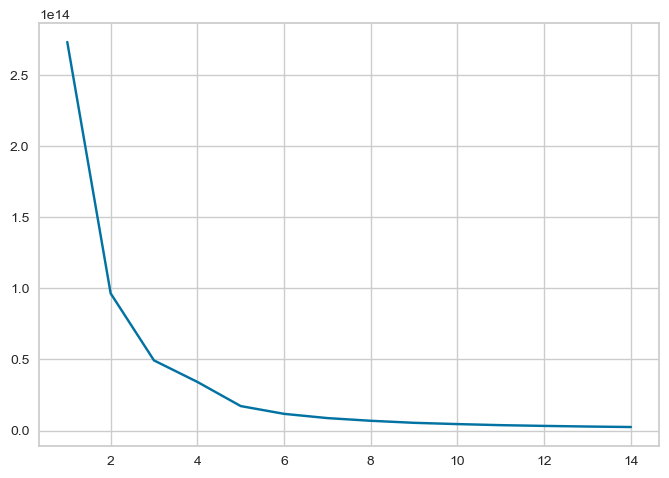

In [161]:
fig, ax = plt.subplots()

ax.plot(valores_k,inercias)

plt.show()

In [162]:
cluster_empr = KMeans(n_clusters=3, random_state=42).fit(df_c)

In [163]:
cluster_empr.labels_

array([0, 0, 0, ..., 0, 0, 2])

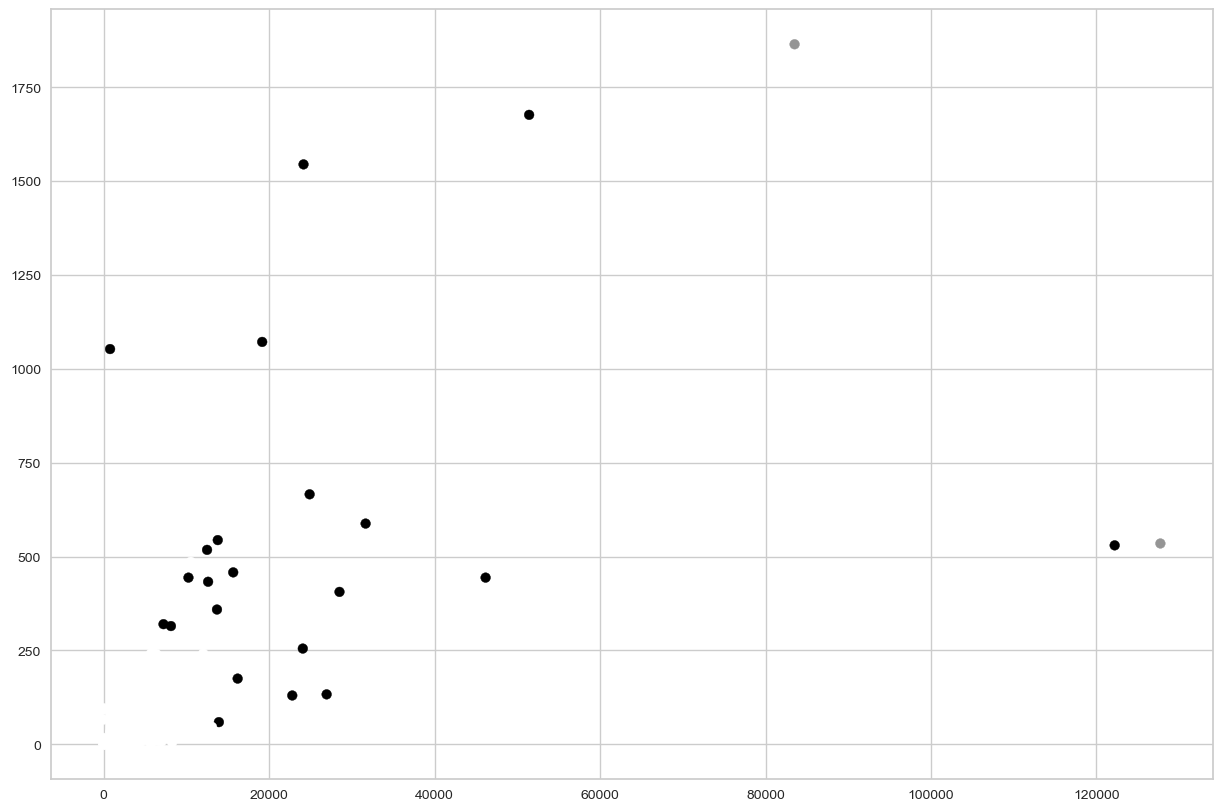

In [164]:
#verificar se eu dividi as posições de x e y corretamente

fig, ax = plt.subplots(figsize= (15,10))

ax.scatter(df_c.iloc[:,1], df_c.iloc[:,0], c = cluster_empr.labels_)

plt.show()

In [165]:
df_c['cluster'] = cluster_empr.labels_

In [166]:
df_c.head()

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,cluster
qtd_abertas_Empresario_Individual,,,,,,,,,,,,,,,,,,,,,
167,7,926,5,34,6,23,480,543,495,502,...,0,0,0,0,0,0,0,0,0,0
1058,41,2563,11,86,42,299,481,549,513,512,...,0,1,0,1,1,0,0,1,0,0
50,0,344,3,79,0,0,442,506,466,484,...,1,0,0,0,1,0,0,0,0,0
987,17,1971,12,89,202,469,484,549,513,524,...,0,1,1,1,0,0,0,0,0,0
181,2,591,7,89,0,38,466,551,498,493,...,0,0,0,0,0,1,0,0,0,0
